In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


In [14]:
df = pd.read_csv("Power Consumption dataset.csv")

df.head()

,Unnamed: 0,timestamp,day_of_week,hour_of_day,is_weekend,temperature,is_holiday,solar_generation,load,compensation_method
0,0,2023-01-01 00:00:00,6,0,1,17.483571,0,7.819507,18493,Normal Operation
1,1,2023-01-01 01:00:00,6,1,1,14.308678,0,0.886376,17090,Normal Operation
2,2,2023-01-01 02:00:00,6,2,1,18.238443,0,0.798470,16052,Normal Operation
3,3,2023-01-01 03:00:00,6,3,1,22.615149,0,3.067700,15356,Normal Operation
4,4,2023-01-01 04:00:00,6,4,1,13.829233,0,0.359479,14936,Normal Operation


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         8737 non-null   datetime64[ns]
 1   day_of_week       8737 non-null   int64         
 2   hour_of_day       8737 non-null   int64         
 3   is_weekend        8737 non-null   int64         
 4   temperature       8737 non-null   float64       
 5   is_holiday        8737 non-null   int64         
 6   solar_generation  8737 non-null   float64       
 7   load              8737 non-null   int64         
 8   month             8737 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5)
memory usage: 580.3 KB


In [26]:
df.columns

Index(['timestamp', 'day_of_week', 'hour_of_day', 'is_weekend', 'temperature',
       'is_holiday', 'solar_generation', 'load', 'month'],
      dtype='object')

In [27]:
df.dtypes

timestamp           datetime64[ns]
day_of_week                  int64
hour_of_day                  int64
is_weekend                   int64
temperature                float64
is_holiday                   int64
solar_generation           float64
load                         int64
month                        int32
dtype: object

In [15]:
df = df.drop(columns=["Unnamed: 0", "compensation_method"])

df['timestamp'] = pd.to_datetime(df['timestamp'])

df['month'] = df['timestamp'].dt.month

X = df.drop(columns=["timestamp", "load"])
y = df["load"]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()


In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [18]:

y_pred = model.predict(X_test_scaled)


mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 1073.1068535469105
RMSE: 1541.453357655997


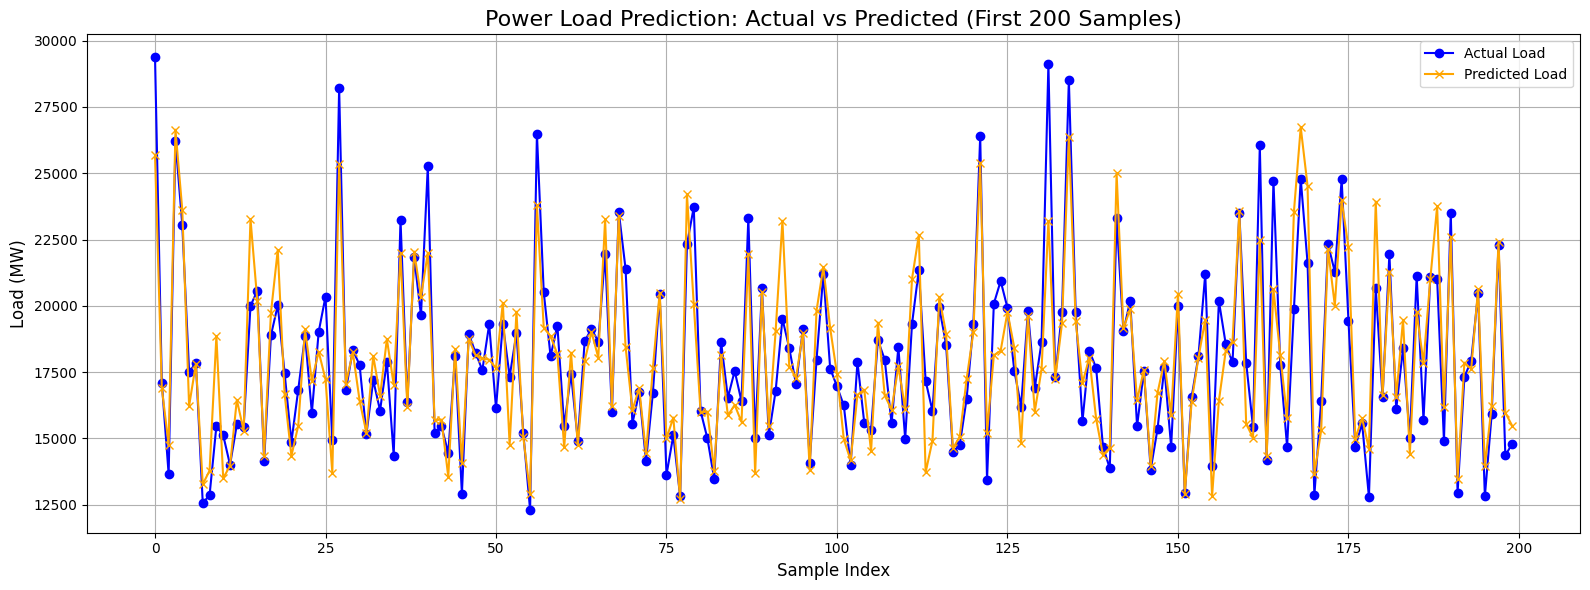

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 6))
plt.plot(y_test.values[:200], label='Actual Load', color='blue', marker='o')
plt.plot(y_pred[:200], label='Predicted Load', color='orange', marker='x')


plt.title("Power Load Prediction: Actual vs Predicted (First 200 Samples)", fontsize=16)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Load (MW)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\nstiw\AppData\Local\Temp\ipykernel_17456\1040994044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=features[sorted_idx], palette="viridis")


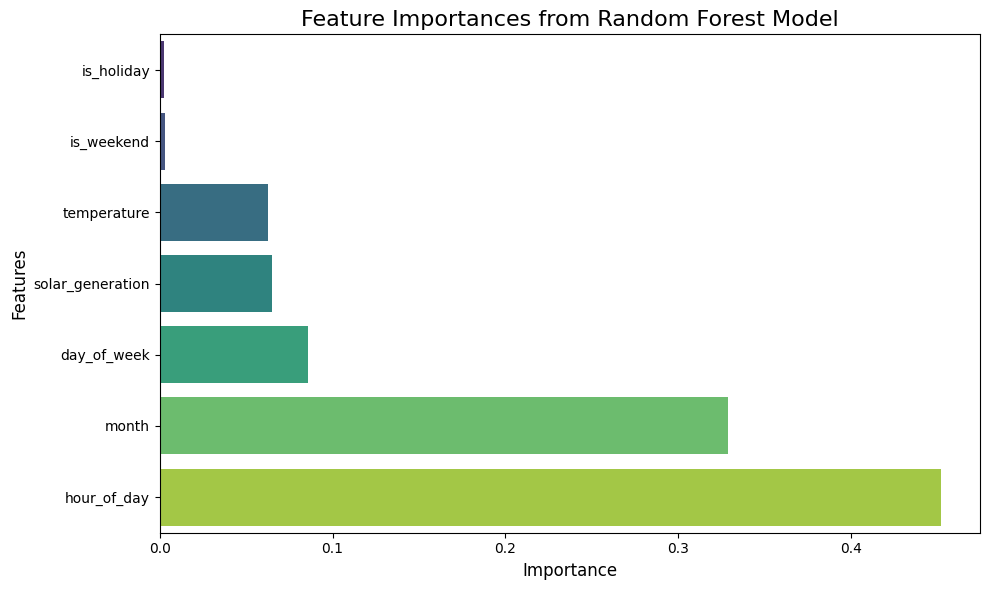

In [20]:
importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx], palette="viridis")
plt.title("Feature Importances from Random Forest Model", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


In [21]:
plt.savefig("actual_vs_predicted.png")
plt.savefig("feature_importance.png")


<Figure size 640x480 with 0 Axes>